In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import folium
import json

In [18]:
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [19]:
pop_1 = pd.read_csv("datas\population_ages_ch.csv", encoding="cp949")
pop_1.columns = (
    pop_1.columns.str.replace('2025년03월_', '', regex=False)
)
pop_1

,행정구역,계_총인구수,계_연령구간인구수,계_0~9세,계_10~19세,계_20~29세,계_30~39세,계_40~49세,계_50~59세,계_60~69세,...,여_10~19세,여_20~29세,여_30~39세,여_40~49세,여_50~59세,여_60~69세,여_70~79세,여_80~89세,여_90~99세,여_100세 이상
0,서울특별시 양천구 (1147000000),"429,468","429,468","23,550","46,552","48,943","52,293","70,240","73,464","62,811",...,"22,409","24,397","26,297","36,616","37,159","32,967","18,990","8,232","1,616",58
1,서울특별시 양천구 목1동(1147051000),"30,009","30,009","2,357","5,049","2,777","2,672","6,435","5,133","3,152",...,"2,565","1,442","1,528","3,535","2,470","1,627",869,379,71,3
2,서울특별시 양천구 목2동(1147052000),"28,228","28,228","1,154","2,150","3,996","5,044","4,139","4,543","4,178",...,979,"2,087","2,511","2,120","2,451","2,198","1,123",490,95,3
3,서울특별시 양천구 목3동(1147053000),"20,874","20,874",986,"1,237","2,863","3,758","2,880","3,280","3,341",...,562,"1,478","1,931","1,484","1,792","1,816",940,405,98,2
4,서울특별시 양천구 목4동(1147054000),"24,082","24,082",918,"2,864","3,546","2,758","3,592","4,859","3,047",...,"1,377","1,688","1,331","1,982","2,497","1,573",934,431,85,2
5,서울특별시 양천구 목5동(1147055000),"40,668","40,668","2,935","7,207","3,759","3,405","8,594","6,676","4,690",...,"3,267","1,834","1,867","4,784","3,210","2,453","1,171",448,126,2
6,서울특별시 양천구 신월1동(1147056000),"18,821","18,821",579,"1,063","2,007","2,342","2,539","3,317","3,852",...,494,998,"1,006","1,143","1,600","1,916","1,163",460,80,4
7,서울특별시 양천구 신월2동(1147057000),"20,498","20,498","1,139","1,728","2,235","2,649","3,129","3,271","3,349",...,903,"1,107","1,321","1,530","1,637","1,853","1,126",427,76,6
8,서울특별시 양천구 신월3동(1147058000),"13,962","13,962",575,868,"1,497","1,853","1,768","2,468","2,673",...,412,707,858,811,"1,087","1,232",799,400,48,1
9,서울특별시 양천구 신월4동(1147059000),"17,018","17,018",953,"1,501","1,769","1,980","2,672","2,791","2,831",...,717,827,977,"1,336","1,433","1,537",953,397,73,4


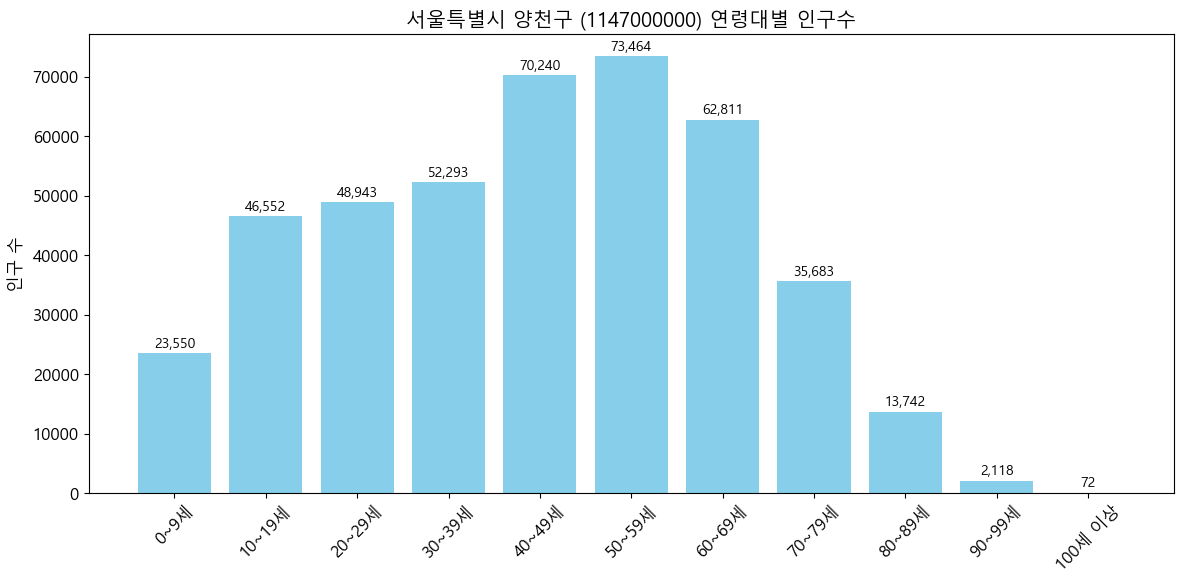

In [20]:
age_cols = pop_1.columns[3:14]
age_values = pop_1.iloc[0, 3:14].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)
x_labels = [col.replace("계_", "") for col in age_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, age_values, color='skyblue')
plt.xticks(rotation=45)
plt.title(f"{pop_1.iloc[0, 0]} 연령대별 인구수")
plt.ylabel("인구 수")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 400,  # 막대보다 약간 위에
        f'{height:,}',  # 천 단위 쉼표 표시
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

In [ ]:
pop_2 = pd.read_csv("datas\population_ages_ch_gender.csv", encoding="cp949")
pop_2.columns = (
    pop_2.columns.str.replace('2025년03월_', '', regex=False)
)
pop_2

,행정구역,남_총인구수,남_연령구간인구수,남_0~9세,남_10~19세,남_20~29세,남_30~39세,남_40~49세,남_50~59세,남_60~69세,...,여_10~19세,여_20~29세,여_30~39세,여_40~49세,여_50~59세,여_60~69세,여_70~79세,여_80~89세,여_90~99세,여_100세 이상
0,서울특별시 양천구 (1147000000),"209,250","209,250","12,073","24,143","24,546","25,996","33,624","36,305","29,844",...,"22,409","24,397","26,297","36,616","37,159","32,967","18,990","8,232","1,616",58
1,서울특별시 양천구 목1동(1147051000),"14,341","14,341","1,178","2,484","1,335","1,144","2,900","2,663","1,525",...,"2,565","1,442","1,528","3,535","2,470","1,627",869,379,71,3
2,서울특별시 양천구 목2동(1147052000),"13,611","13,611",594,"1,171","1,909","2,533","2,019","2,092","1,980",...,979,"2,087","2,511","2,120","2,451","2,198","1,123",490,95,3
3,서울특별시 양천구 목3동(1147053000),"9,881","9,881",501,675,"1,385","1,827","1,396","1,488","1,525",...,562,"1,478","1,931","1,484","1,792","1,816",940,405,98,2
4,서울특별시 양천구 목4동(1147054000),"11,721","11,721",457,"1,487","1,858","1,427","1,610","2,362","1,474",...,"1,377","1,688","1,331","1,982","2,497","1,573",934,431,85,2
5,서울특별시 양천구 목5동(1147055000),"20,146","20,146","1,575","3,940","1,925","1,538","3,810","3,466","2,237",...,"3,267","1,834","1,867","4,784","3,210","2,453","1,171",448,126,2
6,서울특별시 양천구 신월1동(1147056000),"9,665","9,665",287,569,"1,009","1,336","1,396","1,717","1,936",...,494,998,"1,006","1,143","1,600","1,916","1,163",460,80,4
7,서울특별시 양천구 신월2동(1147057000),"9,987","9,987",614,825,"1,128","1,328","1,599","1,634","1,496",...,903,"1,107","1,321","1,530","1,637","1,853","1,126",427,76,6
8,서울특별시 양천구 신월3동(1147058000),"7,340","7,340",308,456,790,995,957,"1,381","1,441",...,412,707,858,811,"1,087","1,232",799,400,48,1
9,서울특별시 양천구 신월4동(1147059000),"8,264","8,264",453,784,942,"1,003","1,336","1,358","1,294",...,717,827,977,"1,336","1,433","1,537",953,397,73,4


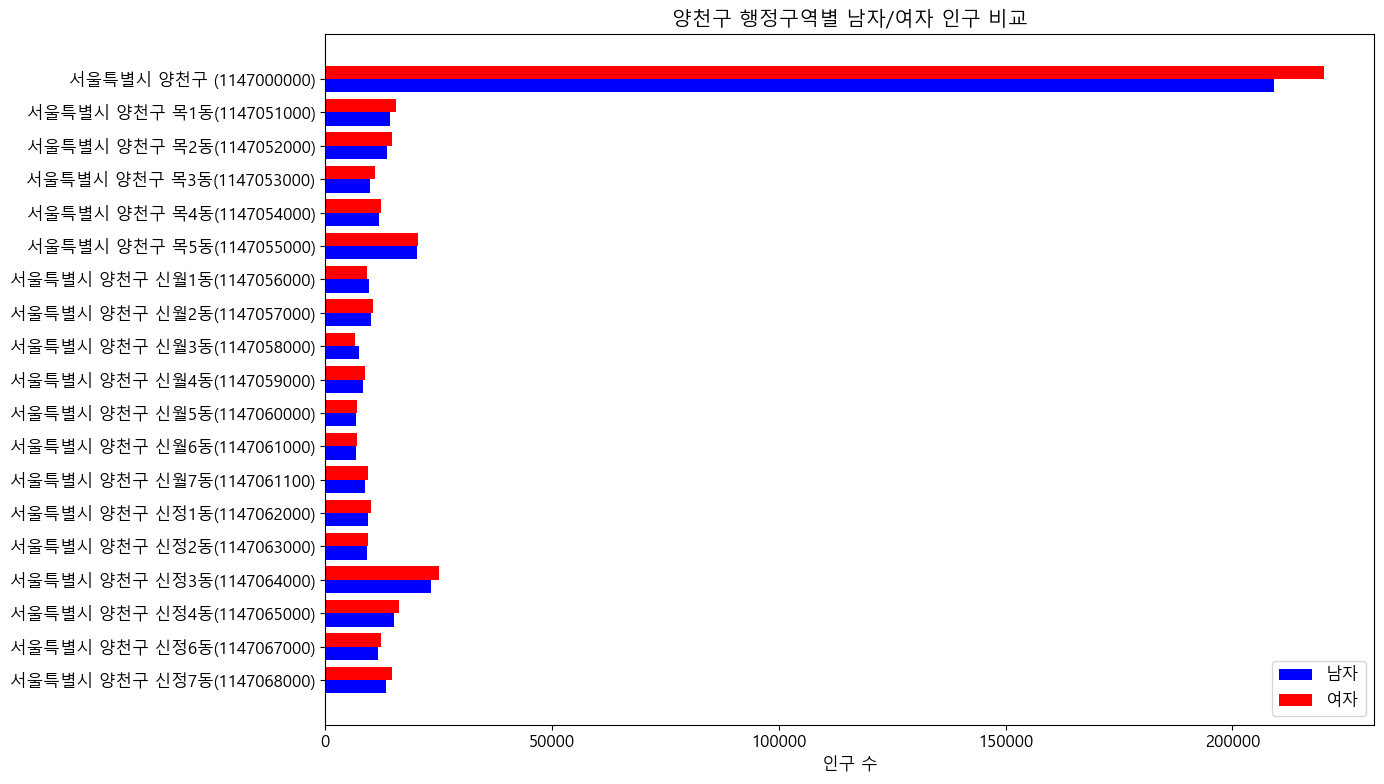

In [44]:
# 정확한 열 이름 사용하기
pop_2['남_총인구수'] = pop_2['남_총인구수'].str.replace(',', '').astype(int)
pop_2['여_총인구수'] = pop_2['여_총인구수'].str.replace(',', '').astype(int)  # 이 열이 데이터에 있다고 가정

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(pop_2))

plt.barh([i + bar_width for i in index], pop_2['남_총인구수'], bar_width, label='남자', color='blue')
plt.barh(index, pop_2['여_총인구수'], bar_width, label='여자', color='red')

plt.yticks([i + bar_width / 2 for i in index], pop_2['행정구역'])
plt.xlabel('인구 수')
plt.title('양천구 행정구역별 남자/여자 인구 비교')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [46]:
행정구역 = [
    "양천구",
    "목1동",
    "목2동",
    "목3동",
    "목4동",
    "목5동",
    "신월1동",
    "신월2동",
    "신월3동",
    "신월4동",
    "신월5동",
    "신월6동",
    "신월7동",
    "신정1동",
    "신정2동",
    "신정3동",
    "신정4동",
    "신정6동",
    "신정7동"
]


인구수 = [
    209250,14341,13611,9881,11721,20146,9665,9987,7340,8264,6821,6684,
    8828,9479,9085,23247,15163,11611,13376

]


위도 = [
    37.51423056,37.52774782,37.53513,37.5385,37.5350,37.5330,
    37.51985566,37.5200,37.5180,37.5170,37.5160,37.5150,37.51673125,37.5200,37.5210,
    37.5220,37.5230,37.5240,37.5039617

]

경도 = [
    126.8687083,126.8760305,126.87346,126.8765,126.8700,126.8720,126.8350649
    ,126.8370,126.8360,126.8350,126.8340,126.8330,126.8346716,126.8500,
    126.8510,126.8520,126.8530,126.8540,126.8681744

]

df = pd.DataFrame({
    '행정구역': 행정구역,
    '인구수': 인구수,
    '위도': 위도,
    '경도': 경도
})


m = folium.Map(location=[37.6360, 127.2165], zoom_start=11)

for _, row in df.iterrows():
    if pd.notna(row['위도']) and pd.notna(row['경도']):
        population_text = f"{row['인구수']:,}명" if row['인구수'] > 0 else "정보 없음" # 0명일 경우 다르게 표시 (선택사항)
        popup = f"<b>{row['행정구역']}</b><br>인구수: {population_text}"
        if row['인구수'] >= 200000:
            color = 'orange' 
        elif row['인구수'] >= 25000:
            color = 'red'
        else:
            color = 'blue'
        
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=popup,
            tooltip=row['행정구역'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

#m.save("yangju_population_map.html")
m


In [24]:
pop_3 = pd.read_csv("datas\population_ages_ch.csv", encoding="cp949")
pop_3

,행정구역,2025년03월_계_총인구수,2025년03월_계_연령구간인구수,2025년03월_계_0~9세,2025년03월_계_10~19세,2025년03월_계_20~29세,2025년03월_계_30~39세,2025년03월_계_40~49세,2025년03월_계_50~59세,2025년03월_계_60~69세,...,2025년03월_여_10~19세,2025년03월_여_20~29세,2025년03월_여_30~39세,2025년03월_여_40~49세,2025년03월_여_50~59세,2025년03월_여_60~69세,2025년03월_여_70~79세,2025년03월_여_80~89세,2025년03월_여_90~99세,2025년03월_여_100세 이상
0,서울특별시 양천구 (1147000000),"429,468","429,468","23,550","46,552","48,943","52,293","70,240","73,464","62,811",...,"22,409","24,397","26,297","36,616","37,159","32,967","18,990","8,232","1,616",58
1,서울특별시 양천구 목1동(1147051000),"30,009","30,009","2,357","5,049","2,777","2,672","6,435","5,133","3,152",...,"2,565","1,442","1,528","3,535","2,470","1,627",869,379,71,3
2,서울특별시 양천구 목2동(1147052000),"28,228","28,228","1,154","2,150","3,996","5,044","4,139","4,543","4,178",...,979,"2,087","2,511","2,120","2,451","2,198","1,123",490,95,3
3,서울특별시 양천구 목3동(1147053000),"20,874","20,874",986,"1,237","2,863","3,758","2,880","3,280","3,341",...,562,"1,478","1,931","1,484","1,792","1,816",940,405,98,2
4,서울특별시 양천구 목4동(1147054000),"24,082","24,082",918,"2,864","3,546","2,758","3,592","4,859","3,047",...,"1,377","1,688","1,331","1,982","2,497","1,573",934,431,85,2
5,서울특별시 양천구 목5동(1147055000),"40,668","40,668","2,935","7,207","3,759","3,405","8,594","6,676","4,690",...,"3,267","1,834","1,867","4,784","3,210","2,453","1,171",448,126,2
6,서울특별시 양천구 신월1동(1147056000),"18,821","18,821",579,"1,063","2,007","2,342","2,539","3,317","3,852",...,494,998,"1,006","1,143","1,600","1,916","1,163",460,80,4
7,서울특별시 양천구 신월2동(1147057000),"20,498","20,498","1,139","1,728","2,235","2,649","3,129","3,271","3,349",...,903,"1,107","1,321","1,530","1,637","1,853","1,126",427,76,6
8,서울특별시 양천구 신월3동(1147058000),"13,962","13,962",575,868,"1,497","1,853","1,768","2,468","2,673",...,412,707,858,811,"1,087","1,232",799,400,48,1
9,서울특별시 양천구 신월4동(1147059000),"17,018","17,018",953,"1,501","1,769","1,980","2,672","2,791","2,831",...,717,827,977,"1,336","1,433","1,537",953,397,73,4


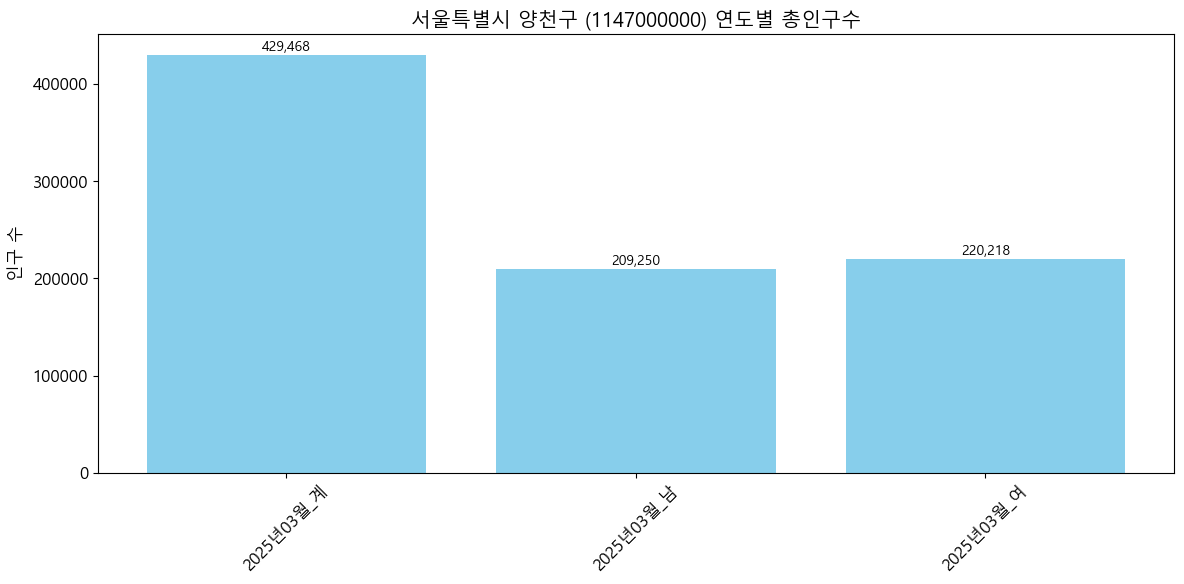

In [25]:
total_pop_cols = [col for col in pop_3.columns if "총인구수" in col
]
age_values = pop_3.loc[0, total_pop_cols].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)

age_cols = [col.replace("_총인구수", "") for col in total_pop_cols]

plt.figure(figsize=(12, 6))
bars = plt.bar(age_cols, age_values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1000,
        f'{height:,}',
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.title(f"{pop_3.iloc[0, 0]} 연도별 총인구수")
plt.ylabel("인구 수")
plt.tight_layout()
plt.show()